In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import re
import jieba
import jieba.posseg as psg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

## Dataset

In [2]:
df1=pd.read_csv('jjwxc_1.csv',index_col=0)
df2=pd.read_csv('jjwxc_2.csv',index_col=0)
df=pd.concat([df1,df2])

## Data Processing

In [3]:
df.sort_values(['Words'],ascending=0,inplace=True)
df=df.groupby(['Name']).head(1)
df=df[:-7]
df=df.reset_index(drop=True)
df

,Name,Style,Finish,Words,Intro,Short_Intro,Points
0,所有人都知道我是好男人[快穿],轻松,完结\n,3737127.0,【新书我用学习系统搞科技已开，求康康呀】纪长泽的任务是守护会被各种极品渣男毁掉一生的人。然后...,我坏我渣但我是个好男人,6.402449e+09
1,好男人培养系统[快穿],轻松,完结\n,3386025.0,同系列文《我是好男人》已完结可食用。新文《绿茶女主和男配在一起了》已经开始连载~~~季淮世世...,为什么我世世都是大渣男？,1.188079e+09
2,我是大反派[快穿],轻松,完结\n,1742010.0,隔壁同类型新文《快叫我爸爸（快穿）》正在火热更新中人渣or反派的漫漫改造之路暂定世界：抛弃妻...,大反派or渣男改造之旅,3.333574e+09
3,快穿之教你做人,轻松,完结\n,1733164.0,【穿越各个世界，教极品们做人。】备注：1.苏爽文。2.男主始终是一个人，没切片，没失忆，没人...,苏爽快穿,3.262352e+09
4,女配一心学习[快穿],轻松,完结\n,1698365.0,【新文《我的名字祖国知晓[快穿]》：我的名字无人知晓，我的祖国繁荣昌盛。】家庭、金钱、地位…...,学习使我快乐,2.311892e+08
...,...,...,...,...,...,...,...
914,此生长寂寥,正剧,连载\n,21666.0,那天我去拜访她，她已经被病痛折磨的形容枯槁，我想趁着她还清醒，将她生平尽可能记录下来，编纂成...,我这一生,1.375915e+08
915,前男友的高尚品格,轻松,连载\n,19492.0,我有一个失忆梗和泼天狗血要说，接受请往下 ↓陶江遇到海难...,前男友的高尚品格……,6.425470e+07
916,一些番外,正剧,连载\n,16380.0,一些短篇番外免费,番外,4.504072e+07
917,非爱似爱,正剧,连载\n,15762.0,那年，她漫不经心的说：“我们结婚吧”！ 他波澜不惊的回：“好”！ 那年，她神情...,不怕结冰的水，就怕结冰的心。,2.219260e+05


In [4]:
df['Finish']=df['Finish'].astype(str)
df['Finish']=df['Finish'].apply(lambda x: x.replace("\n", " "))

In [5]:
df

,Name,Style,Finish,Words,Intro,Short_Intro,Points
0,所有人都知道我是好男人[快穿],轻松,完结,3737127.0,【新书我用学习系统搞科技已开，求康康呀】纪长泽的任务是守护会被各种极品渣男毁掉一生的人。然后...,我坏我渣但我是个好男人,6.402449e+09
1,好男人培养系统[快穿],轻松,完结,3386025.0,同系列文《我是好男人》已完结可食用。新文《绿茶女主和男配在一起了》已经开始连载~~~季淮世世...,为什么我世世都是大渣男？,1.188079e+09
2,我是大反派[快穿],轻松,完结,1742010.0,隔壁同类型新文《快叫我爸爸（快穿）》正在火热更新中人渣or反派的漫漫改造之路暂定世界：抛弃妻...,大反派or渣男改造之旅,3.333574e+09
3,快穿之教你做人,轻松,完结,1733164.0,【穿越各个世界，教极品们做人。】备注：1.苏爽文。2.男主始终是一个人，没切片，没失忆，没人...,苏爽快穿,3.262352e+09
4,女配一心学习[快穿],轻松,完结,1698365.0,【新文《我的名字祖国知晓[快穿]》：我的名字无人知晓，我的祖国繁荣昌盛。】家庭、金钱、地位…...,学习使我快乐,2.311892e+08
...,...,...,...,...,...,...,...
914,此生长寂寥,正剧,连载,21666.0,那天我去拜访她，她已经被病痛折磨的形容枯槁，我想趁着她还清醒，将她生平尽可能记录下来，编纂成...,我这一生,1.375915e+08
915,前男友的高尚品格,轻松,连载,19492.0,我有一个失忆梗和泼天狗血要说，接受请往下 ↓陶江遇到海难...,前男友的高尚品格……,6.425470e+07
916,一些番外,正剧,连载,16380.0,一些短篇番外免费,番外,4.504072e+07
917,非爱似爱,正剧,连载,15762.0,那年，她漫不经心的说：“我们结婚吧”！ 他波澜不惊的回：“好”！ 那年，她神情...,不怕结冰的水，就怕结冰的心。,2.219260e+05


In [6]:
df_copy=df

In [7]:
df_copy.isnull().sum()

Name           0
Style          0
Finish         0
Words          0
Intro          1
Short_Intro    9
Points         6
dtype: int64

In [8]:
df_copy.dropna(axis=0, how='any', inplace=True)

In [9]:
df_copy

,Name,Style,Finish,Words,Intro,Short_Intro,Points
0,所有人都知道我是好男人[快穿],轻松,完结,3737127.0,【新书我用学习系统搞科技已开，求康康呀】纪长泽的任务是守护会被各种极品渣男毁掉一生的人。然后...,我坏我渣但我是个好男人,6.402449e+09
1,好男人培养系统[快穿],轻松,完结,3386025.0,同系列文《我是好男人》已完结可食用。新文《绿茶女主和男配在一起了》已经开始连载~~~季淮世世...,为什么我世世都是大渣男？,1.188079e+09
2,我是大反派[快穿],轻松,完结,1742010.0,隔壁同类型新文《快叫我爸爸（快穿）》正在火热更新中人渣or反派的漫漫改造之路暂定世界：抛弃妻...,大反派or渣男改造之旅,3.333574e+09
3,快穿之教你做人,轻松,完结,1733164.0,【穿越各个世界，教极品们做人。】备注：1.苏爽文。2.男主始终是一个人，没切片，没失忆，没人...,苏爽快穿,3.262352e+09
4,女配一心学习[快穿],轻松,完结,1698365.0,【新文《我的名字祖国知晓[快穿]》：我的名字无人知晓，我的祖国繁荣昌盛。】家庭、金钱、地位…...,学习使我快乐,2.311892e+08
...,...,...,...,...,...,...,...
914,此生长寂寥,正剧,连载,21666.0,那天我去拜访她，她已经被病痛折磨的形容枯槁，我想趁着她还清醒，将她生平尽可能记录下来，编纂成...,我这一生,1.375915e+08
915,前男友的高尚品格,轻松,连载,19492.0,我有一个失忆梗和泼天狗血要说，接受请往下 ↓陶江遇到海难...,前男友的高尚品格……,6.425470e+07
916,一些番外,正剧,连载,16380.0,一些短篇番外免费,番外,4.504072e+07
917,非爱似爱,正剧,连载,15762.0,那年，她漫不经心的说：“我们结婚吧”！ 他波澜不惊的回：“好”！ 那年，她神情...,不怕结冰的水，就怕结冰的心。,2.219260e+05


### Statistics

In [10]:
df_copy.groupby(['Finish']).describe()

Words                                                              \
        count           mean            std      min        25%       50%   
Finish                                                                      
完结      479.0  503148.025052  341343.054015  31043.0  318436.00  427137.0   
连载      430.0  189677.234884  184014.288342  11646.0   74522.25  148334.0   

                             Points                                         \
              75%        max  count          mean           std        min   
Finish                                                                       
完结      574688.50  3737127.0  479.0  2.023775e+09  2.245150e+09  1307126.0   
连载      249112.25  1493216.0  430.0  1.888603e+08  5.390435e+08   221926.0   

                                                               
                25%           50%           75%           max  
Finish                                                         
完结      487463888.0  1.128677e+09  3.238010e+09  1.684968e+10  
连载       10072047.0  4.009684e+07  1.245710e+08  6.014928e+09

In [11]:
df_copy.groupby(['Finish']).median()

,Words,Points
Finish,,
完结,427137.0,1.128677e+09
连载,148334.0,4.009684e+07


In [12]:
style_re=df_copy['Style'].value_counts()
style_re

轻松    648
正剧    248
爆笑      7
悲剧      4
暗黑      2
Name: Style, dtype: int64

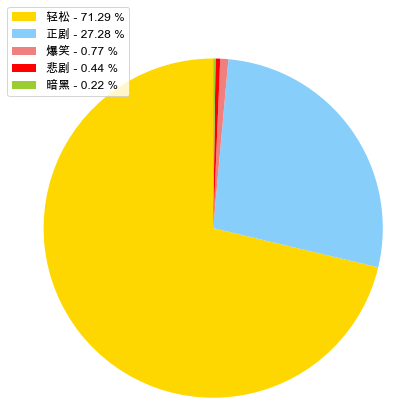

In [13]:
plt.figure(figsize=(20, 6.5))
x=np.array(['轻松','正剧','爆笑','悲剧','暗黑'])
y=np.array(style_re)
colors = ['gold','lightskyblue','lightcoral','red','yellowgreen']
porcent=100.*y/y.sum()

patches, texts=plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend=True

if sort_legend:
    patches, labels, dummy=zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)

plt.savefig('piechart.png', bbox_inches='tight')

## Text Analysis

In [14]:
def get_stop_dict(file):
    content=open(file,encoding="utf-8")
    word_list=[]
    for c in content:
        c = re.sub('\n|\r','',c)
        word_list.append(c)
    return word_list

In [15]:
stop_file="stopwordlist.txt"
user_file="add_word_list.txt"
stop_words=get_stop_dict(stop_file)
jieba.load_userdict(user_file)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/2c/9rtp3qc16_v9_n6zry13tgbw0000gn/T/jieba.cache
Loading model cost 0.643 seconds.
Prefix dict has been built successfully.


### Title

In [37]:
text_lines_name=df_copy['Name'] #load text
flag_list=['n','nz','a', 'v'] #the part of speech: nouns, proper nouns, adjective
counts={}

for line in text_lines_name:
    line_seg=psg.cut(line) #note the part of speech of every word
    for word_flag in line_seg:
        word=re.sub("[^\u4e00-\u9fa5]","",word_flag.word) #judging whether it is Chinese or not
        if word_flag.flag in flag_list and len(word)>1 and word not in stop_words:
            counts[word]=counts.get(word,0)+1

word_freq_name=pd.DataFrame({'word':list(counts.keys()),'freq':list(counts.values())})
word_freq_name=word_freq_name.sort_values(by='freq',ascending=False)

In [38]:
word_re=word_freq_name[word_freq_name['freq']>=10]
word_re

,word,freq
82,娱乐圈,28
7,穿成,24
62,豪门,21
102,爆红,18
12,大佬,17
16,重生,16
383,心动,14
321,月亮,14
4,反派,13
71,综艺,13


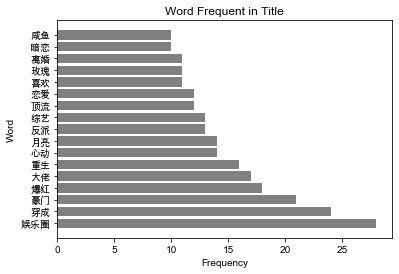

In [39]:
plt.barh(word_re['word'], word_re['freq'], color='gray')
plt.title('Word Frequent in Title')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

### Intro

In [29]:
text_lines=df_copy['Intro'] #load text
flag_list=['n','nz','a'] #the part of speech
counts={}

for line in text_lines:
    line_seg=psg.cut(line)
    for word_flag in line_seg: 
        word=re.sub("[^\u4e00-\u9fa5]","",word_flag.word)  #judging whether it is Chinese or not
        if word_flag.flag in flag_list and len(word)>1 and word not in stop_words:
            counts[word]=counts.get(word,0)+1 

word_freq_intro=pd.DataFrame({'word':list(counts.keys()),'freq':list(counts.values())}) #create freq df
word_freq_intro=word_freq_intro.sort_values(by='freq',ascending=False) #rank

In [30]:
intro_re=word_freq_intro[word_freq_intro['freq']>=100]
intro_re

,word,freq
27,男人,1005
90,大佬,356
701,温柔,337
22,世界,314
0,系统,309
...,...,...
1784,冷淡,105
1126,观众,104
957,医生,104
1981,语气,103


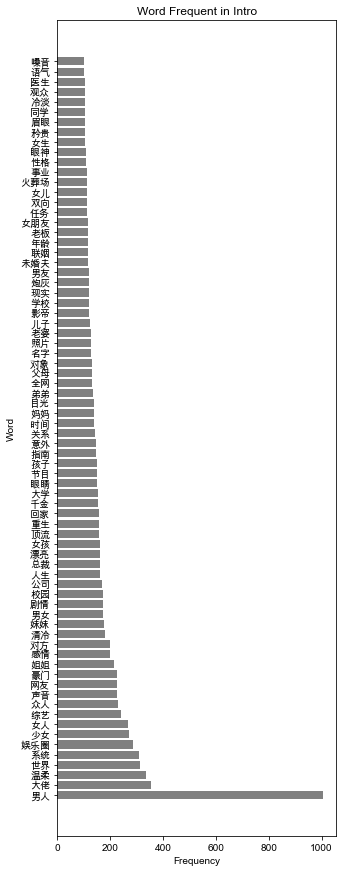

In [21]:
plt.figure(1, [5, 15])
plt.barh(intro_re['word'], intro_re['freq'], color='gray')
plt.title('Word Frequent in Intro')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

### Short Intro

In [40]:
text_lines_shortintro=df_copy['Short_Intro'].astype(str)
flag_list=['n','nz','a', 'v']
counts={}

for line in text_lines_shortintro:
    line_seg = psg.cut(line)
    for word_flag in line_seg:
        word = re.sub("[^\u4e00-\u9fa5]","",word_flag.word)
        if word_flag.flag in flag_list and len(word)>1 and word not in stop_words:
            counts[word]=counts.get(word,0)+1

word_freq_shortintro=pd.DataFrame({'word':list(counts.keys()),'freq':list(counts.values())})
word_freq_shortintro=word_freq_shortintro.sort_values(by='freq',ascending=False)

In [41]:
word_freq_intro=pd.merge(word_freq_intro, word_freq_shortintro, how='left', on=['word'])
word_freq_intro['freq']=word_freq_intro['freq_x']+word_freq_intro['freq_y']

In [42]:
word_freq_intro=word_freq_intro.drop(columns=['freq_x','freq_y'])

In [43]:
re_shortintro=word_freq_shortintro[word_freq_shortintro['freq']>=10]
re_shortintro

,word,freq
178,暗恋,40
9,大佬,30
181,火葬场,23
180,追妻,15
196,少女,15
415,温柔,13
321,姐姐,12
1,男人,11
191,顶流,11
141,谈恋爱,10


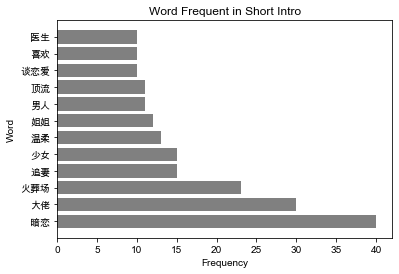

In [44]:
plt.barh(re_shortintro['word'], re_shortintro['freq'], color='gray')
plt.title('Word Frequent in Short Intro')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()